In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
train = pd.read_csv('../input/mengary-revenue-prediction/train.csv',index_col=0)
test = pd.read_csv('../input/mengary-revenue-prediction/test.csv',index_col=0)

In [3]:
train

,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date
id,,,,,,,,,,,,,,,
1,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,2018-01-01,77095,Texas,2018-01-01
2,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,2018-01-01,48185,Michigan,2018-01-01
3,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,2018-01-01,48185,Michigan,2018-01-01
4,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,2018-01-01,48185,Michigan,2018-01-01
5,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,2018-01-01,48185,Michigan,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6696,Burlington,0.0,542.940,3,East,kariox,Consumer,battery,Standard Class,9389,152.0232,2021-01-01,5408,Vermont,2021-01-01
6697,San Jose,0.2,276.784,2,West,kariox,Corporate,headset,Standard Class,9597,89.9548,2021-01-01,95123,California,2021-01-01
6698,Burlington,0.0,2.040,1,East,kariox,Consumer,watch,Standard Class,9390,0.9588,2021-01-01,5408,Vermont,2021-01-01


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6700 entries, 1 to 6700
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   departure city   6700 non-null   object 
 1   discount         6700 non-null   float64
 2   price            6700 non-null   float64
 3   no of items      6700 non-null   int64  
 4   location         6700 non-null   object 
 5   class            6700 non-null   object 
 6   segment          6700 non-null   object 
 7   sub-class        6700 non-null   object 
 8   delivery type    6699 non-null   object 
 9   RID              6700 non-null   int64  
 10  profit           6700 non-null   float64
 11  delivery date    6700 non-null   object 
 12  address code     6700 non-null   int64  
 13  departure state  6700 non-null   object 
 14  placement date   6700 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 837.5+ KB


<AxesSubplot:xlabel='departure city'>

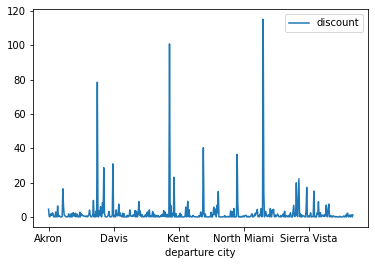

In [5]:
df = train[['departure city','discount']]
df.groupby('departure city',axis=0).sum().plot()

<AxesSubplot:xlabel='location'>

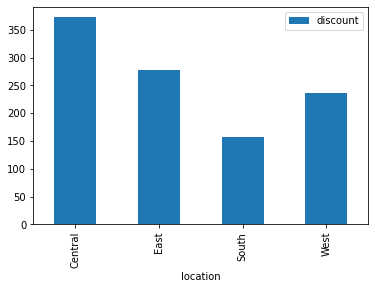

In [6]:
df = train[['location','discount']]
df.groupby('location',axis=0).sum().plot(kind='bar')

<AxesSubplot:xlabel='class'>

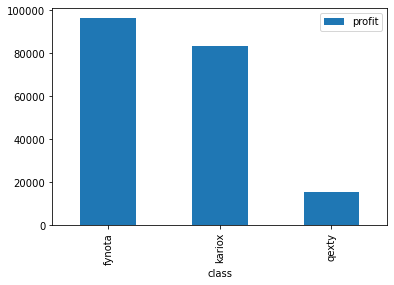

In [7]:
train[['class','profit']].groupby('class',axis=0).sum().plot.bar()

<AxesSubplot:xlabel='delivery type'>

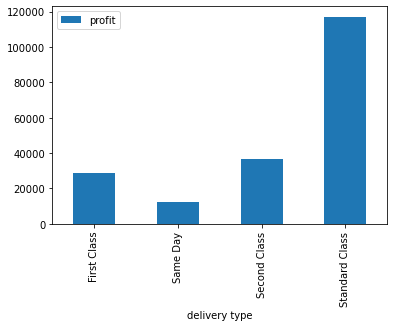

In [8]:
train[['delivery type','profit']].groupby('delivery type',axis=0).sum().plot.bar()

<AxesSubplot:xlabel='segment'>

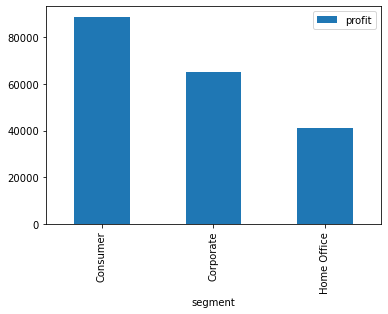

In [9]:
train[['segment','profit']].groupby('segment',axis=0).sum().plot.bar()

<AxesSubplot:xlabel='sub-class'>

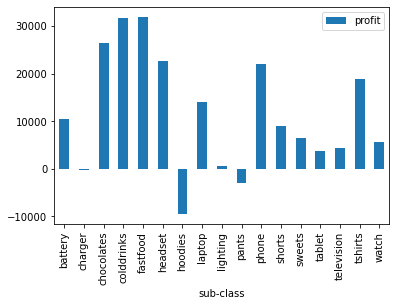

In [10]:
train[['sub-class','profit']].groupby('sub-class',axis=0).sum().plot.bar()

<AxesSubplot:xlabel='location'>

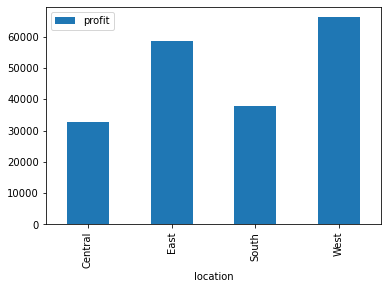

In [11]:
train[['location','profit']].groupby('location',axis=0).sum().plot.bar()

<AxesSubplot:xlabel='departure city'>

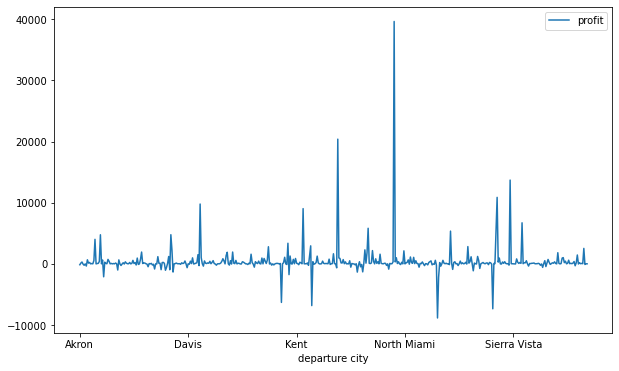

In [12]:
train[['departure city','profit']].groupby('departure city',axis=0).sum().plot(figsize=(10,6))


<AxesSubplot:xlabel='departure state'>

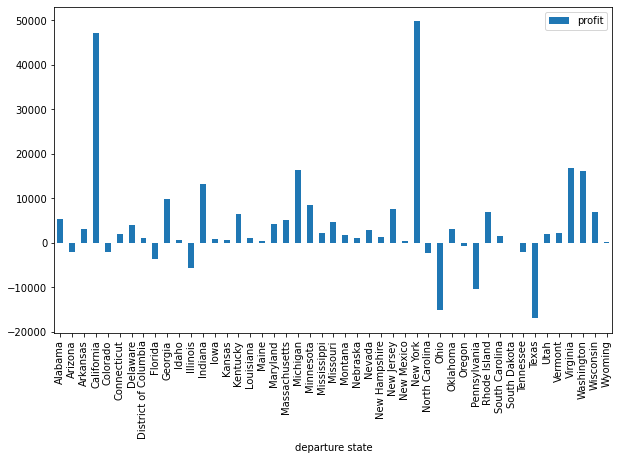

In [13]:
train[['departure state','profit']].groupby('departure state',axis=0).sum().plot(kind='bar',figsize=(10,6))


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='price', ylabel='profit'>

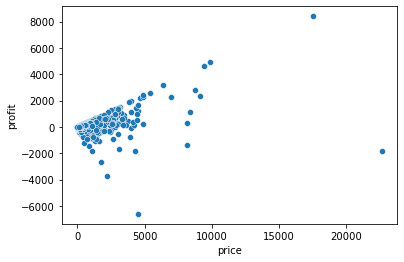

In [14]:
sns.scatterplot(train['price'],train['profit'],palette='rbg')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='delivery type', ylabel='count'>

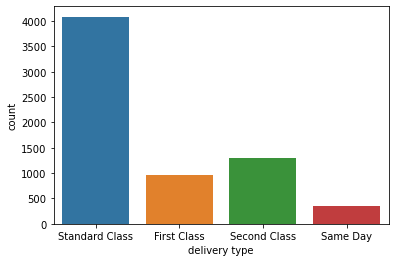

In [15]:
sns.countplot(train['delivery type'])

In [16]:
train['delivery type'] = train['delivery type'].fillna('Standard Class')

In [17]:
train['delivery type'] = train['delivery type'].map({'Standard Class':0,'First Class':1,'Second Class':2,'Same Day':3})

In [18]:
train.isnull().sum()

departure city     0
discount           0
price              0
no of items        0
location           0
class              0
segment            0
sub-class          0
delivery type      0
RID                0
profit             0
delivery date      0
address code       0
departure state    0
placement date     0
dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='departure state', ylabel='count'>

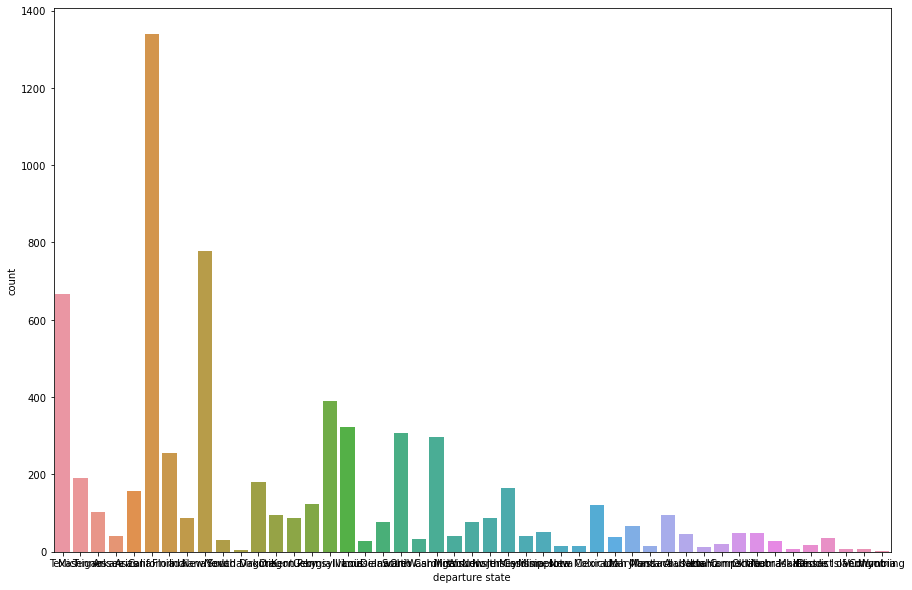

In [19]:
plt.figure(figsize=(15,10))

sns.countplot(train['departure state'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='location', ylabel='count'>

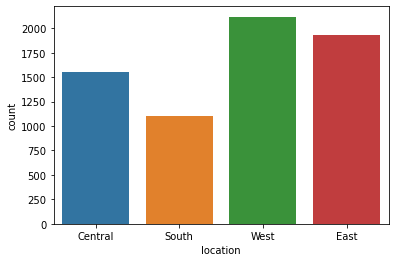

In [20]:
sns.countplot(train['location'])

In [21]:
train['location'] = train['location'].map({'West':0,'East':2,'Central':1,'South':3})

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='class', ylabel='count'>

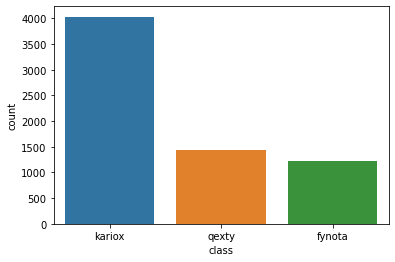

In [22]:
sns.countplot(train['class'])

train['class'] = train['class'].map({'karox':3,'qexty':2,'fynota':1})

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='segment', ylabel='count'>

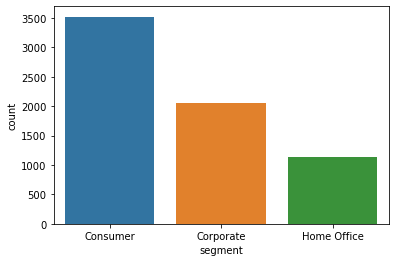

In [23]:
sns.countplot(train['segment'])

In [24]:
train['segment'] = train['segment'].map({'Consumer':0,'Corporate':1,'Home Office':2})



/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='departure state', ylabel='count'>

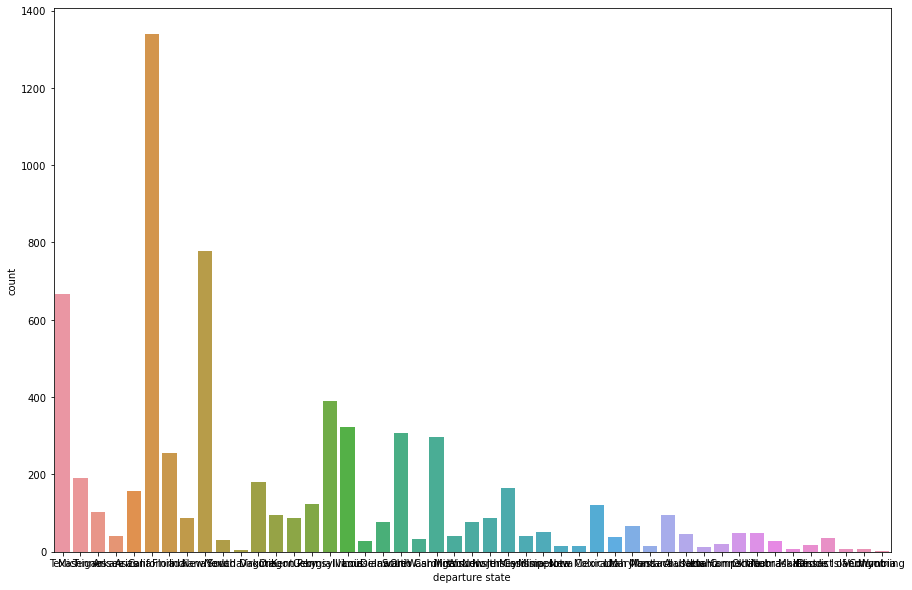

In [25]:
plt.figure(figsize=(15,10))
sns.countplot(train['departure state'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='sub-class', ylabel='count'>

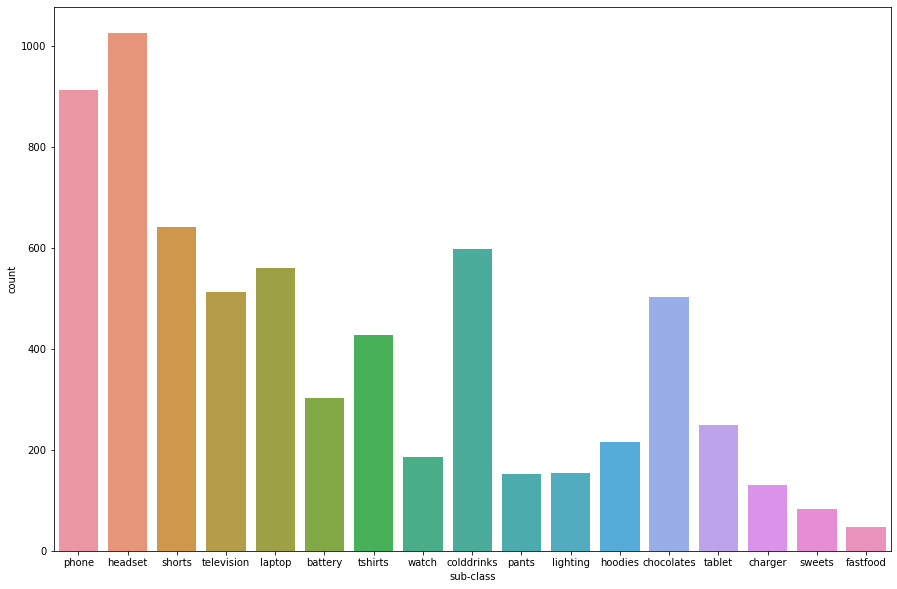

In [26]:
plt.figure(figsize=(15,10))

sns.countplot(train['sub-class'])

In [27]:
from sklearn.preprocessing import OrdinalEncoder

In [28]:
ordinal = OrdinalEncoder()

In [29]:
ordinal = ordinal.fit_transform(train[['sub-class']])

In [30]:
train['sub-class']=ordinal

In [31]:
from sklearn.preprocessing import OrdinalEncoder

In [32]:
oe = OrdinalEncoder()

In [33]:
oe = oe.fit_transform(train[['class']])

In [34]:
train['class'] = oe

In [35]:
train

,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date
id,,,,,,,,,,,,,,,
1,Houston,0.2,16.448,2,1,1.0,0,10.0,0,7981,5.5512,2018-01-01,77095,Texas,2018-01-01
2,Westland,0.0,29.700,5,1,1.0,0,5.0,0,6334,13.3650,2018-01-01,48185,Michigan,2018-01-01
3,Westland,0.0,14.730,3,1,2.0,0,11.0,0,6333,4.8609,2018-01-01,48185,Michigan,2018-01-01
4,Westland,0.0,43.920,3,1,1.0,0,14.0,0,6332,12.7368,2018-01-01,48185,Michigan,2018-01-01
5,Westland,0.0,66.580,2,1,1.0,0,7.0,0,6331,15.9792,2018-01-01,48185,Michigan,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6696,Burlington,0.0,542.940,3,2,1.0,0,0.0,0,9389,152.0232,2021-01-01,5408,Vermont,2021-01-01
6697,San Jose,0.2,276.784,2,0,1.0,1,5.0,0,9597,89.9548,2021-01-01,95123,California,2021-01-01
6698,Burlington,0.0,2.040,1,2,1.0,0,16.0,0,9390,0.9588,2021-01-01,5408,Vermont,2021-01-01


In [36]:
train = train.drop(['departure city','delivery date','address code','departure state','placement date','RID'],axis=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


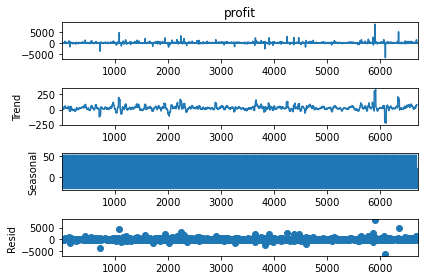

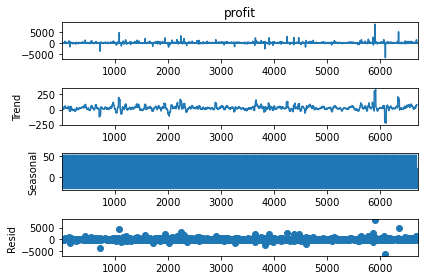

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose
sd = seasonal_decompose(train['profit'],freq=30)
sd.plot()



In [38]:
X= train.drop('profit',axis=1)
y= train['profit']


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.5, random_state=0)

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [43]:
predict = reg.predict(X_test)

In [44]:
reg.score(X_train,y_train)

0.2977740078445079

In [45]:
test

,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,delivery date,address code,departure state,placement date
id,,,,,,,,,,,,,,
6701,San Francisco,0.0,24.200,5,West,kariox,Consumer,television,Standard Class,2408,2021-01-01,94122,California,2021-01-01
6702,San Francisco,0.2,359.976,3,West,fynota,Consumer,colddrinks,Standard Class,2409,2021-01-01,94122,California,2021-01-01
6703,Waterbury,0.0,3.520,2,East,kariox,Consumer,television,Standard Class,5425,2021-01-01,6708,Connecticut,2021-01-01
6704,Chicago,0.2,11.520,5,Central,kariox,Consumer,tablet,First Class,7408,2021-01-01,60653,Illinois,2021-01-01
6705,Seattle,0.0,242.940,3,West,kariox,Home Office,laptop,Standard Class,733,2021-01-01,98115,Washington,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,New York City,0.0,31.920,4,East,kariox,Consumer,laptop,Second Class,1171,2021-12-01,10035,New York,2021-12-01
9991,New York City,0.0,19.440,3,East,kariox,Consumer,phone,Second Class,1170,2021-12-01,10035,New York,2021-12-01
9992,New York City,0.0,272.940,3,East,kariox,Consumer,laptop,Second Class,1169,2021-12-01,10035,New York,2021-12-01


In [46]:
from sklearn.preprocessing import OrdinalEncoder

In [47]:
ordinal = OrdinalEncoder()

In [48]:
ordinal = ordinal.fit_transform(test[['sub-class']])

In [49]:
test['sub-class']=ordinal

In [50]:
from sklearn.preprocessing import OrdinalEncoder

In [51]:
oe = OrdinalEncoder()

In [52]:
oe = oe.fit_transform(test[['class']])

In [53]:
test['class'] = oe

In [54]:
test

,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,delivery date,address code,departure state,placement date
id,,,,,,,,,,,,,,
6701,San Francisco,0.0,24.200,5,West,1.0,Consumer,14.0,Standard Class,2408,2021-01-01,94122,California,2021-01-01
6702,San Francisco,0.2,359.976,3,West,0.0,Consumer,3.0,Standard Class,2409,2021-01-01,94122,California,2021-01-01
6703,Waterbury,0.0,3.520,2,East,1.0,Consumer,14.0,Standard Class,5425,2021-01-01,6708,Connecticut,2021-01-01
6704,Chicago,0.2,11.520,5,Central,1.0,Consumer,13.0,First Class,7408,2021-01-01,60653,Illinois,2021-01-01
6705,Seattle,0.0,242.940,3,West,1.0,Home Office,7.0,Standard Class,733,2021-01-01,98115,Washington,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,New York City,0.0,31.920,4,East,1.0,Consumer,7.0,Second Class,1171,2021-12-01,10035,New York,2021-12-01
9991,New York City,0.0,19.440,3,East,1.0,Consumer,10.0,Second Class,1170,2021-12-01,10035,New York,2021-12-01
9992,New York City,0.0,272.940,3,East,1.0,Consumer,7.0,Second Class,1169,2021-12-01,10035,New York,2021-12-01


In [55]:
test = test.drop(['departure city','delivery date','address code','departure state','placement date','RID'],axis=1)

In [56]:
test['segment'] = test['segment'].map({'Consumer':0,'Corporate':1,'Home Office':2})
test['location'] = test['location'].map({'West':0,'East':2,'Central':1,'South':3})
test['delivery type'] = test['delivery type'].map({'Standard Class':0,'First Class':1,'Second Class':2,'Same Day':3})


In [57]:
test

,discount,price,no of items,location,class,segment,sub-class,delivery type
id,,,,,,,,
6701,0.0,24.200,5,0,1.0,0,14.0,0
6702,0.2,359.976,3,0,0.0,0,3.0,0
6703,0.0,3.520,2,2,1.0,0,14.0,0
6704,0.2,11.520,5,1,1.0,0,13.0,1
6705,0.0,242.940,3,0,1.0,2,7.0,0
...,...,...,...,...,...,...,...,...
9990,0.0,31.920,4,2,1.0,0,7.0,2
9991,0.0,19.440,3,2,1.0,0,10.0,2
9992,0.0,272.940,3,2,1.0,0,7.0,2


In [58]:
prediction = reg.predict(test)

output = pd.DataFrame({ 'Id' : np.arange(6701,9995), 'Profit': prediction })
output.to_csv('submission.csv', index=False)
print("your submission was succesfull")

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [61]:
predictn =rf.predict(X_test)

In [62]:
rf.score(X_train,y_train)

0.9371495371115931

In [63]:
pdct = rf.predict(test)

In [64]:
pdct

array([ 9.343922, 33.199697,  1.098549, ..., 45.359851, -1.134644,
        0.756854])

In [65]:
output = pd.DataFrame({ 'Id' : np.arange(6701,9995), 'Profit': pdct })
output.to_csv('revenue_predict.csv', index=False)
print("your submission was succesfull")

your submission was succesfull


In [66]:
from sklearn.linear_model import Lasso

In [67]:
ls = Lasso()
ls.fit(X_train,y_train)

Lasso()

In [68]:
ls_pred = ls.predict(X_test)

In [69]:
ls.score(X_train,y_train)

0.2973308524655198

In [70]:
from sklearn.linear_model import ARDRegression

In [71]:
ard = ARDRegression()
ard.fit(X_train,y_train)

ARDRegression()

In [72]:
ard_pred = ard.predict(X_test)

In [73]:
ard.score(X_train,y_train)

0.29749429858800924

In [74]:
from sklearn.ensemble import ExtraTreesRegressor

In [75]:
et = ExtraTreesRegressor()
et.fit(X_train,y_train)
et.predict(X_test)

array([-22.269468,   7.410168, -14.550232, ...,  49.422593,   3.846213,
         1.124153])

In [76]:
et.score(X_train,y_train)

0.9999985562002011

In [77]:
et_pred = et.predict(test)

In [78]:
et_pred

array([  9.586086,  31.722521,   1.03828 , ...,  50.181447, -11.993061,
         0.794172])

In [79]:
output = pd.DataFrame({ 'Id' : np.arange(6701,9995), 'Profit': et_pred })
output.to_csv('sub4.csv', index=False)
print("your submission was succesfull")

your submission was succesfull


In [80]:
from sklearn.tree import ExtraTreeRegressor

In [81]:
isf = ExtraTreesRegressor()
isf.fit(X_train,y_train)

ExtraTreesRegressor()

In [82]:
isf_predict = isf.predict(X_test)


In [83]:
isf.score(X_train,y_train)

0.9999985562002011

In [84]:
isf_predict = isf.predict(test)

In [85]:
output = pd.DataFrame({ 'Id' : np.arange(6701,9995), 'Profit': isf_predict })
output.to_csv('sub5.csv', index=False)
print("your submission was succesfull")

your submission was succesfull


In [86]:
from sklearn.gaussian_process import GaussianProcessRegressor

In [87]:
gr = GaussianProcessRegressor()
gr.fit(X_train,y_train)

GaussianProcessRegressor()

In [88]:
gr_predict = gr.predict(X_test)
gr_predict

array([ -0.59340079,   0.36237718, -11.62055807, ...,   7.56945687,
         2.37324911,   1.26695464])

In [89]:
gr.score(X_train,y_train)

0.9999985562002011

In [90]:
gr_predict = gr.predict(test)
gr_predict

array([ 3.47816173,  8.12430931,  1.22951008, ..., -0.40894845,
        1.30257126,  0.19325241])

In [91]:
output = pd.DataFrame({ 'Id' : np.arange(6701,9995), 'Profit': gr_predict })
output.to_csv('sub6.csv', index=False)
print("your submission was succesfull")

your submission was succesfull


In [92]:
gr_predict

array([ 3.47816173,  8.12430931,  1.22951008, ..., -0.40894845,
        1.30257126,  0.19325241])

In [93]:
import xgboost
classifier = xgboost.XGBRegressor()
classifier.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [94]:
cl_pred = classifier.predict(X_test)

In [95]:
classifier.score(X_train,y_train)

0.9989340254337216

In [96]:
output = pd.DataFrame({ 'Id' : np.arange(6701,9995), 'Profit': classifier.predict(test) })
output.to_csv('sub7.csv', index=False)
print("your submission was succesfull")

your submission was succesfull


In [97]:
from sklearn.metrics import accuracy_score

In [98]:
from sklearn.ensemble import AdaBoostRegressor

In [99]:
ad = AdaBoostRegressor()
ad.fit(X_train,y_train)

AdaBoostRegressor()

In [100]:
ad.predict(X_test)

array([  60.05578359,   71.89615257, -107.26126393, ...,   60.05578359,
         71.89615257,   71.89615257])

In [101]:
ad.score(X_train,y_train)

0.8525204883507204